# Stroke Prediction

According to information from Ministry of Health in Singapore, 1 in 4 people will sufer from stroke in their lifetime. And it can happen to anyone regardless of age, ethnicity or scocio-economic status. 

## Import libraris and dataset

The dataset is taken from Kaggle, credit to FEDESORIANO: 
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [251]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import gradio as gr

# ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

In [252]:
# import dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

## Exploratory Data Analysis

In [254]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [255]:
df.shape

(5110, 12)

In [256]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [257]:
# drop row if all columns of a row is null
df.dropna(how = 'all', axis = 0)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


BMI column is missing in 201 rows. There are no other information provided that can be used to calculate BMI.

## Cleaning

In [261]:
# drop id as it is not useful
df = df.drop(columns = ['id'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [262]:
# only BMI has nulls, drop rows with null BMI 
df = df.dropna(subset=['bmi'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [263]:
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [264]:
df[df.gender == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [265]:
# only 1 row has unclear gender value, drop the row
df = df.drop(index = 3116, axis = 0)

In [266]:
df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [267]:
df['hypertension'].value_counts()

0    4457
1     451
Name: hypertension, dtype: int64

In [268]:
df['heart_disease'].value_counts()

0    4665
1     243
Name: heart_disease, dtype: int64

In [269]:
df['ever_married'].value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

In [270]:
df['work_type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [271]:
df['Residence_type'].value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

In [272]:
df['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [273]:
df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [274]:
mask = (df['stroke'] == 1) & (df['smoking_status'] == 'Unknown')
df_stroke_smoke_unknown = df[mask]
df_stroke_smoke_unknown.shape

(29, 11)

In [275]:
indices = df[mask].index.tolist()
print(indices)

[9, 23, 31, 38, 67, 79, 80, 89, 93, 100, 103, 104, 114, 121, 127, 137, 139, 166, 179, 197, 208, 209, 225, 234, 235, 236, 244, 245, 248]


In [276]:
# drop the rows with unknown smoking_status value
df = df.drop([9, 23, 31, 38, 67, 79, 80, 89, 93, 100, 103, 104, 114, 121, 127, 137, 139, 166, 179, 197, 208, 209, 225, 234, 235, 236, 244, 245, 248])

In [277]:
df.shape

(4879, 11)

In [278]:
df0 = df.copy()

## Visualization

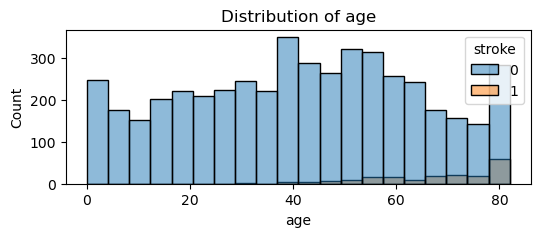

In [280]:
plt.figure(figsize=(6, 2))
plt.title('Distribution of age', fontsize = 12)
sns.histplot(data=df, x='age', hue='stroke')
plt.show()

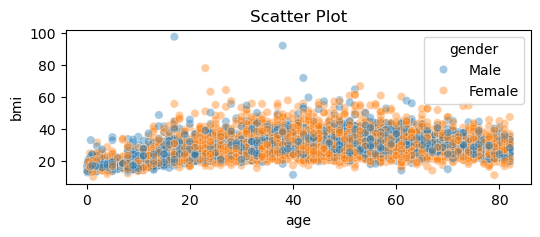

In [281]:
plt.figure(figsize=(6, 2))
plt.title('Scatter Plot', fontsize = 12)
sns.scatterplot(data=df, x='age', y='bmi', hue='gender', alpha=0.4)
plt.show()

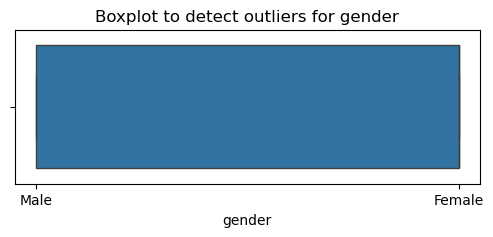

In [282]:
plt.figure(figsize=(6, 2))
plt.title('Boxplot to detect outliers for gender', fontsize = 12)
sns.boxplot(x=df['gender'])
plt.show()

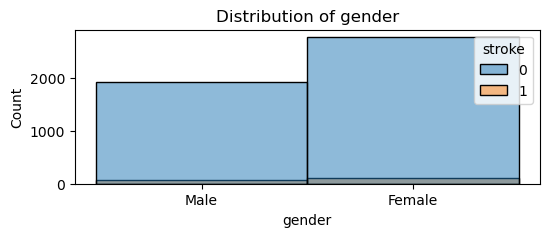

In [283]:
plt.figure(figsize=(6, 2))
plt.title('Distribution of gender', fontsize = 12)
sns.histplot(data=df, x='gender', hue='stroke')
plt.show()

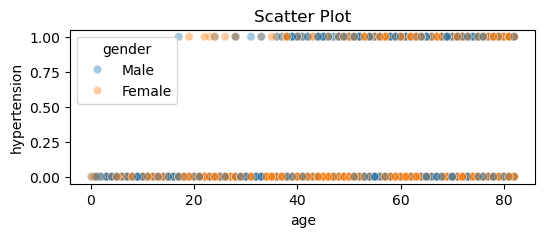

In [284]:
plt.figure(figsize=(6, 2))
plt.title('Scatter Plot', fontsize = 12)
sns.scatterplot(data=df, x='age', y='hypertension', hue='gender', alpha=0.4)
plt.show()

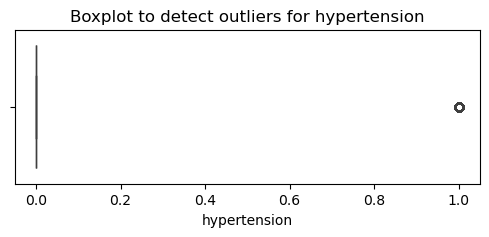

In [285]:
plt.figure(figsize=(6, 2))
plt.title('Boxplot to detect outliers for hypertension', fontsize = 12)
sns.boxplot(x=df['hypertension'])
plt.show()

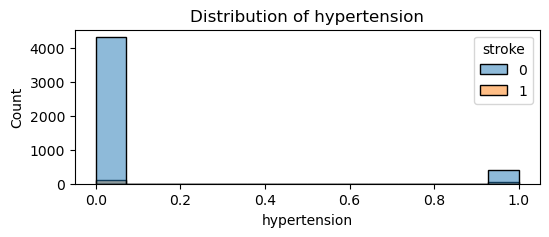

In [286]:
plt.figure(figsize=(6, 2))
plt.title('Distribution of hypertension', fontsize = 12)
sns.histplot(data=df, x='hypertension', hue='stroke')
plt.show()

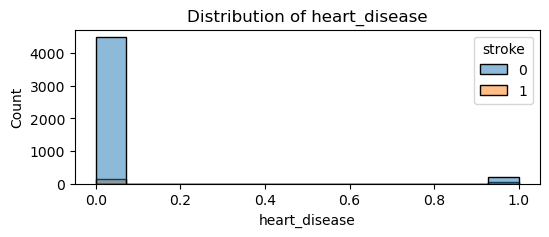

In [287]:
# plt.figure(figsize=(6, 2))
# plt.title('Boxplot to detect outliers for heart_disease', fontsize = 12)
# sns.boxplot(x=df['heart_disease'])
# plt.show()
plt.figure(figsize=(6, 2))
plt.title('Distribution of heart_disease', fontsize = 12)
sns.histplot(data=df, x='heart_disease', hue='stroke')
plt.show()

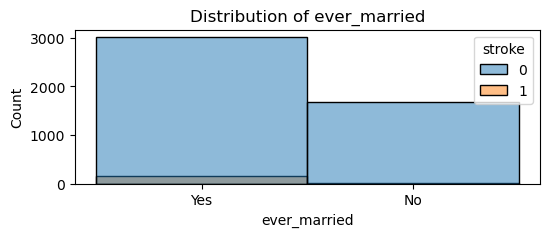

In [288]:
# plt.figure(figsize=(6, 2))
# plt.title('?ver_married', fontsize = 12)
# sns.boxplot(x=df['ever_married'])
# plt.show()
plt.figure(figsize=(6, 2))
plt.title('Distribution of ever_married', fontsize = 12)
sns.histplot(data=df, x='ever_married', hue='stroke')
plt.show()

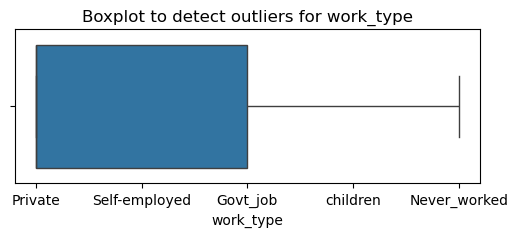

In [289]:
plt.figure(figsize=(6, 2))
plt.title('Boxplot to detect outliers for work_type', fontsize = 12)
sns.boxplot(x=df['work_type'])
plt.show()

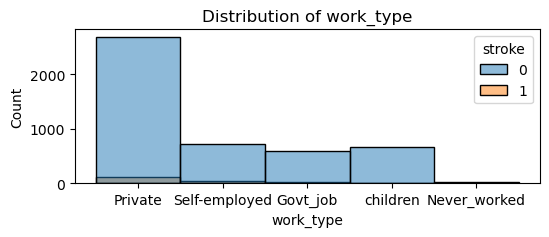

In [290]:
plt.figure(figsize=(6, 2))
plt.title('Distribution of work_type', fontsize = 12)
sns.histplot(data=df, x='work_type', hue='stroke')
plt.show()

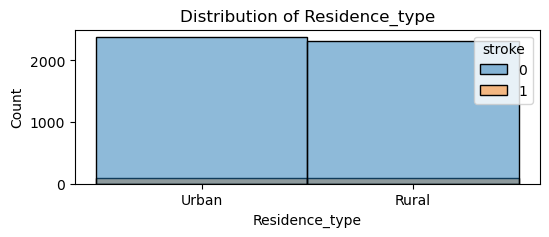

In [291]:
# plt.figure(figsize=(6, 2))
# plt.title('Boxplot to detect outliers for Residence_type', fontsize = 12)
# sns.boxplot(x=df['Residence_type'])
# plt.show()
plt.figure(figsize=(6, 2))
plt.title('Distribution of Residence_type', fontsize = 12)
sns.histplot(data=df, x='Residence_type', hue='stroke')
plt.show()

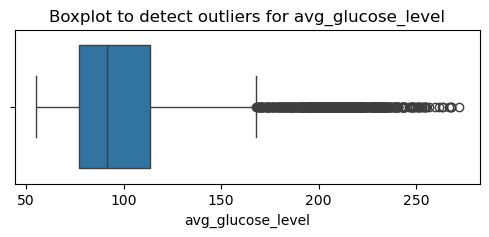

In [292]:
plt.figure(figsize=(6, 2))
plt.title('Boxplot to detect outliers for avg_glucose_level', fontsize = 12)
sns.boxplot(x=df['avg_glucose_level'])
plt.show()

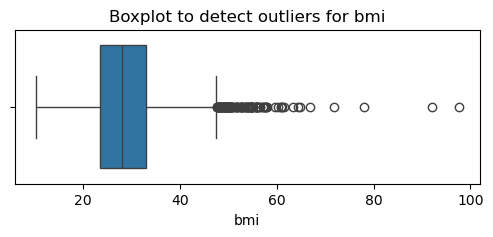

In [293]:
plt.figure(figsize=(6, 2))
plt.title('Boxplot to detect outliers for bmi', fontsize = 12)
sns.boxplot(x=df['bmi'])
plt.show()

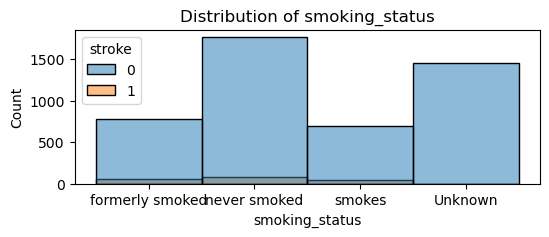

In [294]:
plt.figure(figsize=(6, 2))
plt.title('Distribution of smoking_status', fontsize = 12)
sns.histplot(data=df, x='smoking_status', hue='stroke')
plt.show()

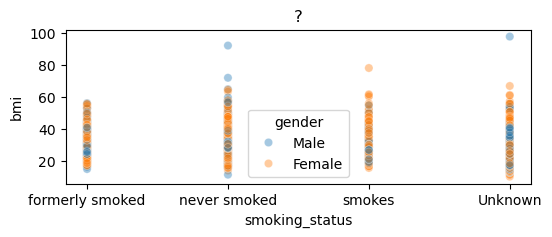

In [295]:
plt.figure(figsize=(6, 2))
plt.title('?', fontsize = 12)
sns.scatterplot(data=df, x='smoking_status', y='bmi', hue='gender', alpha=0.4)
plt.show()

<Axes: >

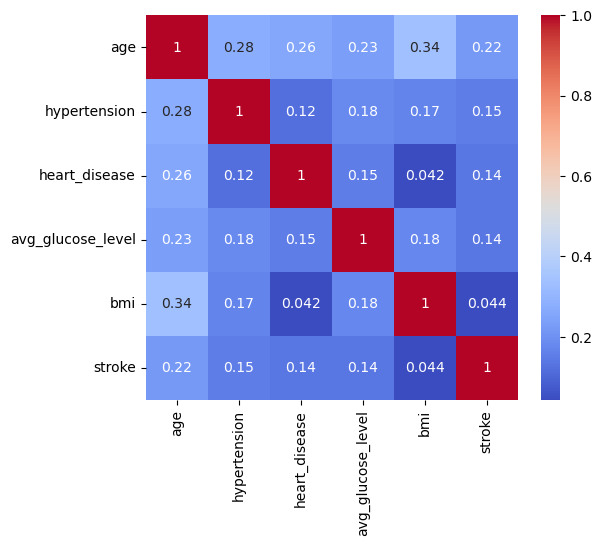

In [296]:
# plot the correlation matrix as a heatmap

plt.figure(figsize = (6,5))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap='coolwarm')

There is no correlation between any of the features. Linear Regression is not a suitable model to use. 

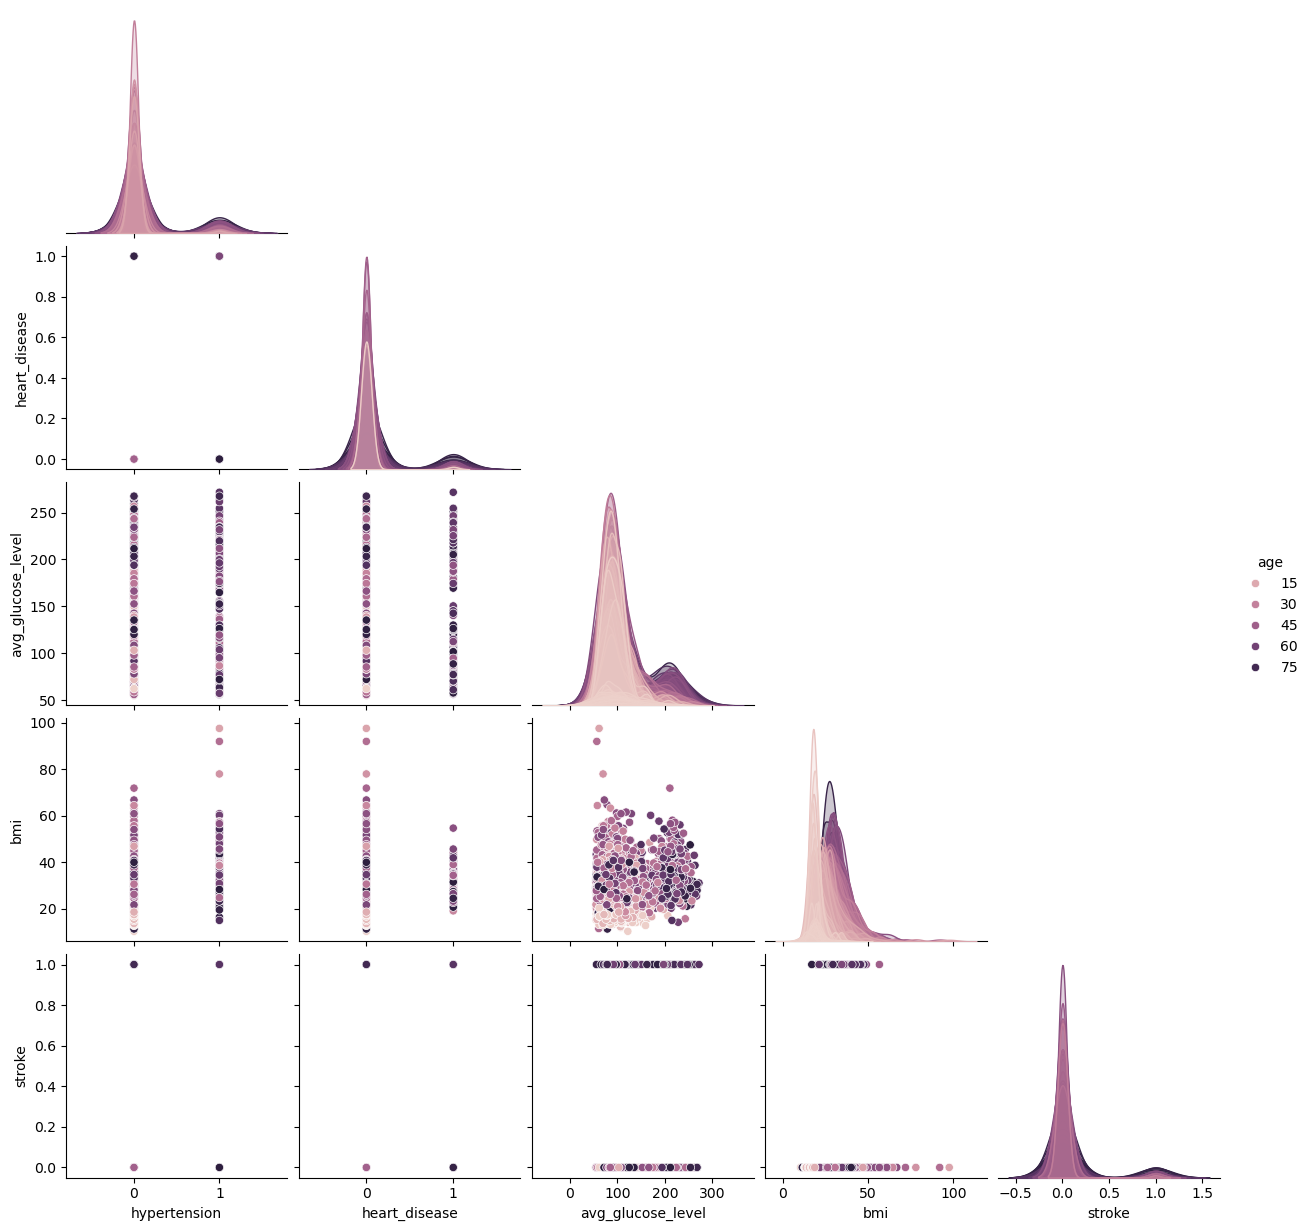

In [298]:
# create a pair plot of the columns 
sns.pairplot(data=df, hue='age', corner=True)  

## Feature Engineering

Categorial columns need to be converted to binary.
1. gender
2. ever_married
3. work_type
4. Residence_type
5. smoking_status

In [300]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [301]:
df = pd.get_dummies(df, drop_first=True)

In [302]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0


In [303]:
df.shape

(4879, 16)

## Splitting data

In [305]:
# Selecting the predictors and target
X = df.drop('stroke', axis=1)  # taking all columns as input except stroke column
y = df['stroke']   # taking only stroke column as the target

In [306]:
# Verifying the features and target variables
display(X.head())
display(y.head())

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,1,0,0,1,1,0,0


0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [307]:
# Split the data into train and test
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (3415, 15)
Test Shape (1464, 15)


In [308]:
# instantiating and training the model on training dataset, 
lr = LogisticRegression()
lr.fit(X_train,y_train)

# making predictions for the testing data
lr_prediction = lr.predict(X_test)

# checking performance
lr_accuracy = metrics.accuracy_score(model_lr_prediction, y_test)

print("The accuracy of logistic regression is:", lr_accuracy*100, "%")

The accuracy of logistic regression is: 96.31147540983606 %


In [309]:
# K Nearest Neighbor
knn= KNeighborsClassifier(n_neighbors = 3) # 3 neighbors
knn.fit(X_train,y_train)
KNNprediction=knn.predict(X_test)
knnAccuracy = metrics.accuracy_score(KNNprediction, y_test)
print("The accuracy of KNN model is:", knnAccuracy*100, "%")

The accuracy of KNN model is: 95.08196721311475 %


In [310]:
# Support Vector Classifier
svc = SVC()   
svc.fit(X_train,y_train) 
svcPrediction = svc.predict(X_test)
svcAccuracy = metrics.accuracy_score(svcPrediction,y_test)
print("The accuracy of SVM model is:", svcAccuracy*100, "%")

The accuracy of SVM model is: 96.31147540983606 %


In [311]:
# Decisiom Tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
treePrediction = tree.predict(X_test)
treeAccuracy = metrics.accuracy_score(treePrediction,y_test)
print("The accuracy of Decision Tree model is:", treeAccuracy*100, "%")

The accuracy of Decision Tree model is: 93.16939890710383 %


In [312]:
print("The accuracy of Logistic Regression is:", lr_accuracy*100, "%")
print("The accuracy of KNN model is:", knnAccuracy*100, "%")
print("The accuracy of SVM model is:", svcAccuracy*100, "%")
print("The accuracy of Decision Tree model is:", treeAccuracy*100, "%")

The accuracy of Logistic Regression is: 96.31147540983606 %
The accuracy of KNN model is: 95.08196721311475 %
The accuracy of SVM model is: 96.31147540983606 %
The accuracy of Decision Tree model is: 93.16939890710383 %


<Axes: >

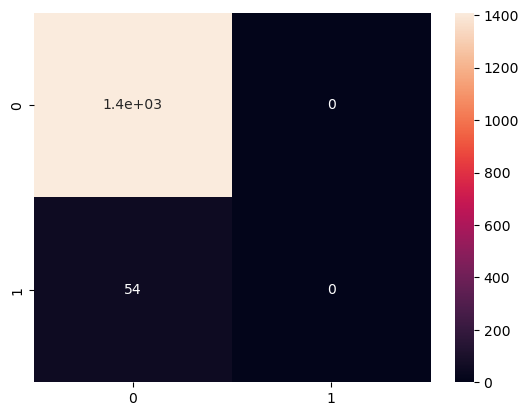

In [313]:
# check the Confusion Matrix of Logistic Regression
logConf = metrics.confusion_matrix(y_test, lr_prediction)
sns.heatmap(logConf, annot = True)

In [314]:
# printing the classification report for logistic regression model
print(metrics.classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.00      0.00      0.00        54

    accuracy                           0.96      1464
   macro avg       0.48      0.50      0.49      1464
weighted avg       0.93      0.96      0.95      1464



              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1410
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1464
   macro avg       0.48      0.49      0.49      1464
weighted avg       0.93      0.95      0.94      1464



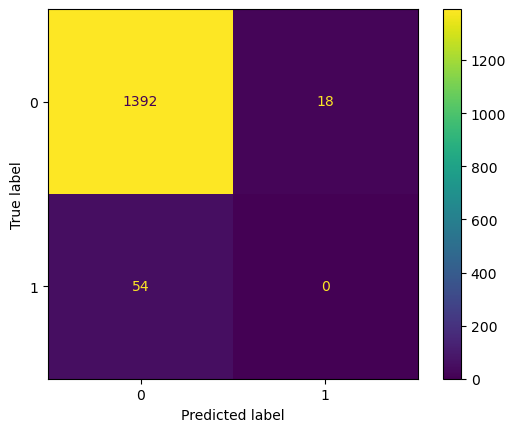

In [315]:
KNNconf = metrics.confusion_matrix(y_test, KNNprediction, labels = knn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = KNNconf, display_labels = knn.classes_)
disp.plot()
print(metrics.classification_report(y_test, KNNprediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.00      0.00      0.00        54

    accuracy                           0.96      1464
   macro avg       0.48      0.50      0.49      1464
weighted avg       0.93      0.96      0.95      1464



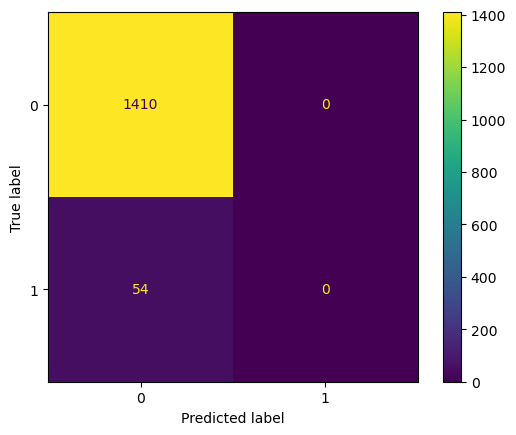

In [316]:
svcConf = metrics.confusion_matrix(y_test, svcPrediction, labels = svc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = svcConf, display_labels = svc.classes_)
disp.plot()
print(metrics.classification_report(y_test, svcPrediction))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1410
           1       0.13      0.15      0.14        54

    accuracy                           0.93      1464
   macro avg       0.55      0.55      0.55      1464
weighted avg       0.94      0.93      0.93      1464



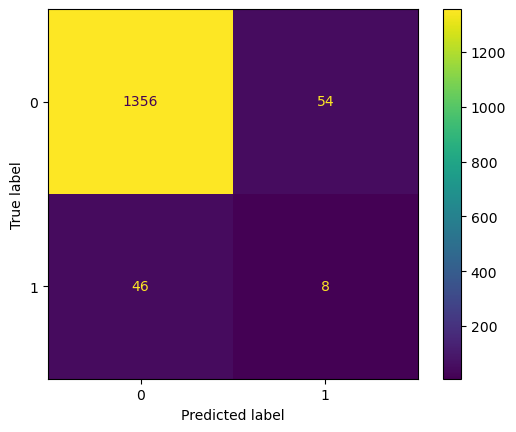

In [317]:
treeConf = metrics.confusion_matrix(y_test, treePrediction, labels = tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = treeConf, display_labels = tree.classes_)
disp.plot()
print(metrics.classification_report(y_test, treePrediction))

<BarContainer object of 4 artists>

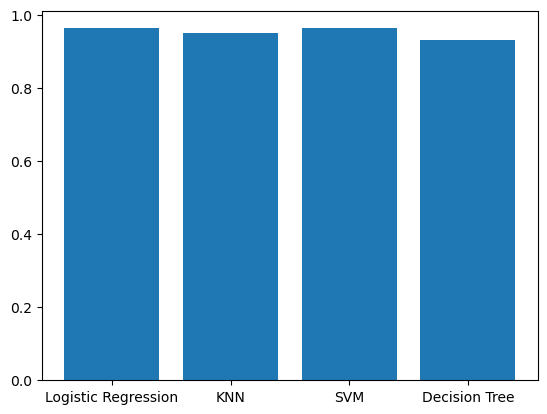

In [318]:
last_scores = {
    'Logistic Regression': lr_accuracy,
    'KNN': knnAccuracy,
    'SVM': svcAccuracy,
    'Decision Tree': treeAccuracy
}

plt.bar(x=last_scores.keys(),
        height=last_scores.values())

## Conclusion

Logistic Regression, KNN, SVM and Decision Tree models can perform reasonably well in predicting stroke. 